## File imports

In [54]:
# import of necessary files

import os
import sys

path = os.path.abspath('')
base_path = path.split('/microbial_ecology_in_space')[0]
module_path = f'{base_path}/microbial_ecology_in_space/models/shared'
module_path_1 = f'{base_path}/microbial_ecology_in_space/models/well_mixed'

# Add the directory to sys.path
if module_path not in sys.path:
    sys.path.append(module_path)
if module_path_1 not in sys.path:
    sys.path.append(module_path_1)

In [64]:
import importlib

import visualize
import definitions
import well_mixed

importlib.reload(definitions)
importlib.reload(well_mixed)
importlib.reload(visualize)

<module 'visualize' from '/Users/federicasibilla/Documenti/Tesi/microbial_ecology_in_space/models/shared/visualize.py'>

In [56]:
# paths for saving notebook results

path = os.path.splitext(os.path.abspath(''))[0]
executable_name = os.path.basename('').split('.')[0]
results_dir = f"{path}_results"
graphs_dir = os.path.join(results_dir, "graphs")
matric_dir = os.path.join(results_dir, "matrices")
output_dir = os.path.join(results_dir, "outputs")
os.makedirs(graphs_dir, exist_ok=True)
os.makedirs(matric_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Well-mixed simulation notebook

Notebook to perform example simulations of a well-mixed system with 8 species. 

## System definition

We first of all define the community parameters and the modeling choices for the simulation.

In [57]:
import numpy as np
import tempfile
from IPython.display import Image, display

In [58]:
# number of species and number of nutrients

n_s = 8
n_r = 25

# number of grid points

n = 100


In [59]:
# defining the uptake matrix
up_mat = definitions.up_binary(n_s,n_r,5)                # defining binary uptake matrix with 5 preferences for each species

# defining sign matrix (all positive nutrients here
sign_mat = np.ones((n_s,n_r))

# no essential nutrients (only catabolic cross-feeding)
mat_ess = np.zeros((n_s,n_r))

# no auxotrophies (anyone can produce what metabolism allows)
spec_met = np.ones((n_s,n_r))

# create metabolic matrix of sparcity 0.8
met_mat = definitions.met_dir(n_r,0.8)

# recapitulate in dictionary
mat = {
    'uptake'  : up_mat,
    'met'     : met_mat,
    'ess'     : mat_ess,
    'spec_met': spec_met,
    'sign'    : sign_mat
}

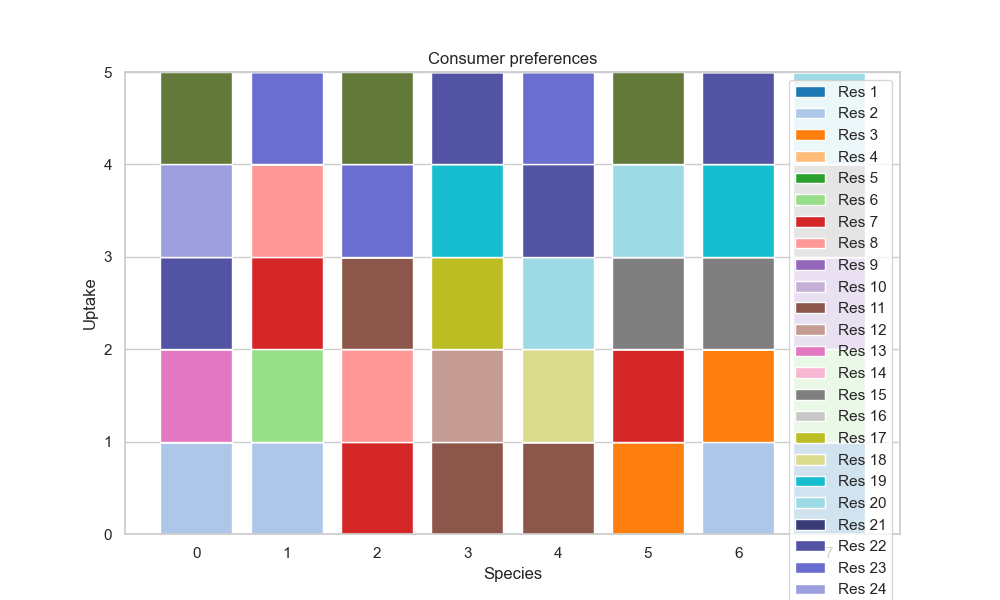

In [60]:
# visualize preferences
def vispreferences_wrapper(mat):
    # Create a temporary directory
    with tempfile.TemporaryDirectory() as tmpdirname:
        # Call the original function
        visualize.vispreferences(mat, tmpdirname)
        # Construct the plot path
        plot_path = os.path.join(tmpdirname, 'up_pref.png')
        # Display the plot in the notebook
        display(Image(filename=plot_path))
        # Remove the file after displaying it
        os.remove(plot_path)

vispreferences_wrapper(mat)

In [61]:
# growth and maintainence
g = np.ones((n_s))
m = np.zeros((n_s))

# reinsertion of chemicals
tau = np.zeros((n_r))+ 10
ext = np.zeros((n_r))
ext[0] = 10
guess = np.ones((n_r))*10

# define parameters
param = {
    # model parameters
    'w'  : np.ones((n_r)),                             # energy conversion     [energy/mass]
    'l'  : np.ones((n_r))*0.8,                         # leakage               [adim]
    'g'  : g,                                          # growth conv. factors  [1/energy]
    'm'  : m,                                          # maintainance requ.    [energy/time]
    'ext': ext,                                        # external replenishment  
    'tau' : tau,                                       # chemicals dilution                             
    'tau_s': 10,                                       # species dilution
    'guess_wm': guess                                  # initial resources guess
}

## Performing the simulation

In [62]:
N_fin,R_fin=well_mixed.run_wellmixed(np.ones((n_s))*0.1,param,mat,well_mixed.dR_dt,well_mixed.dN_dt,5000)

Visualizing the results

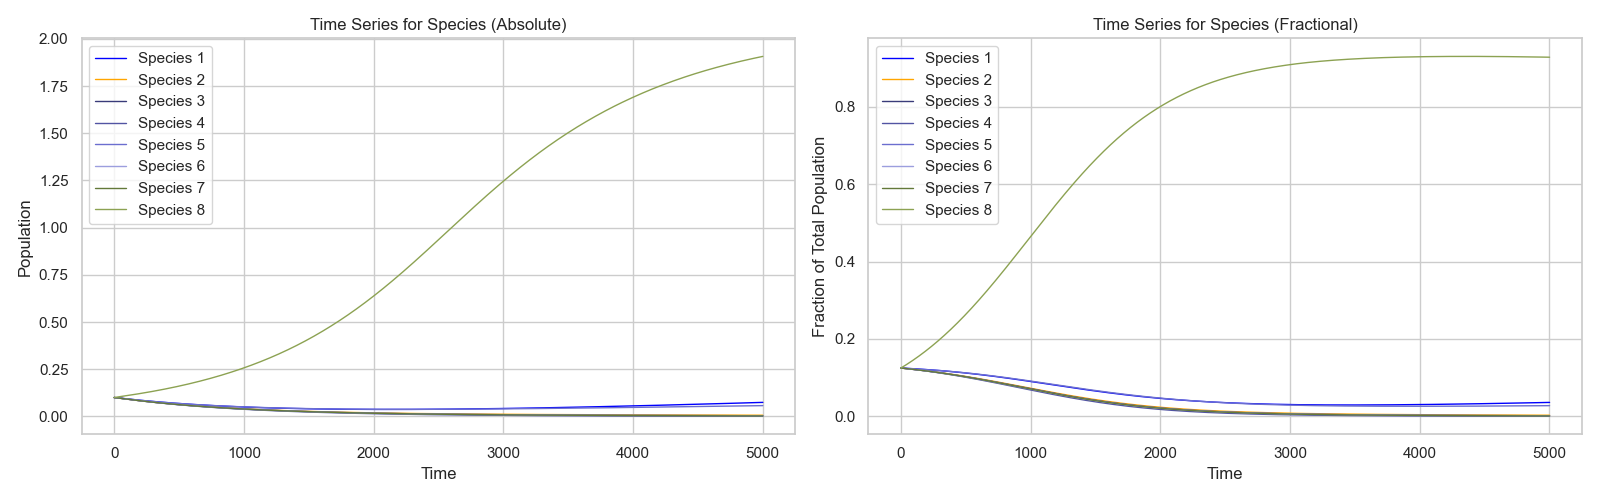

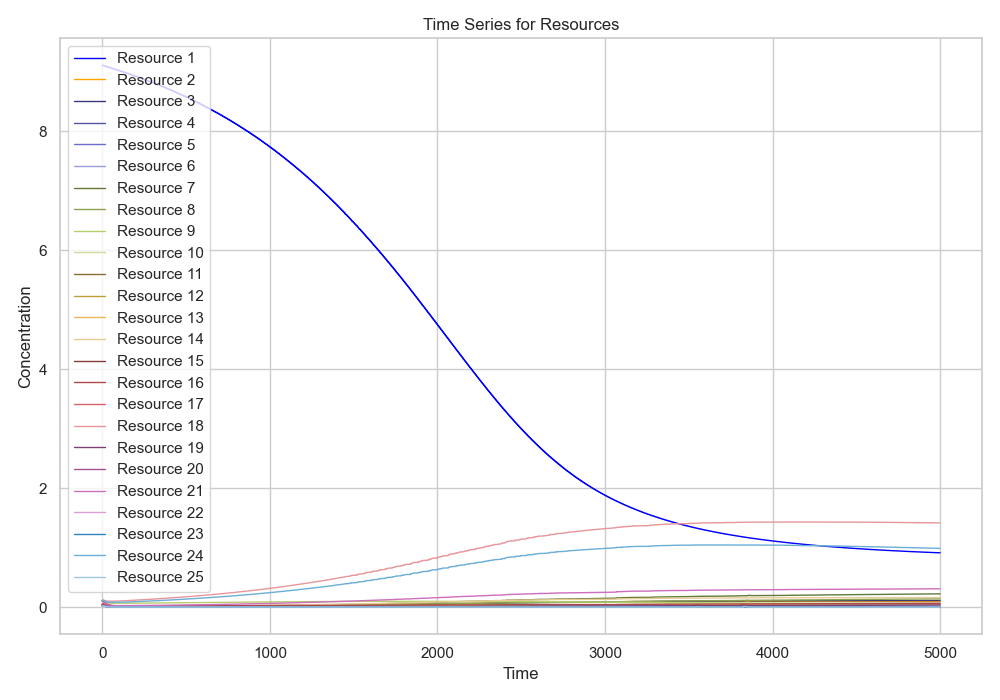

In [65]:
from PIL import Image

def vis_wm_wrapper(N, R):
    """
    Wrapper function to display plots inline in a Jupyter notebook and then delete the files.
    """
    # Create a temporary directory
    with tempfile.TemporaryDirectory() as tmpdirname:
        # Call the original function
        visualize.vis_wm(N, R, tmpdirname)
        
        # Paths to the temporary plot files
        plot_path = os.path.join(tmpdirname, 'wmN.png')
        plot_path_R = os.path.join(tmpdirname, 'wmR.png')
        
        # Display the plots
        for plot in [plot_path, plot_path_R]:
            if os.path.exists(plot):
                img = Image.open(plot)
                display(img)

vis_wm_wrapper(N_fin,R_fin[1:])